In [1]:
import os

import mne
from mne.preprocessing import ICA
import numpy
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
path = 'D:\EEGLAB\SA20140304'
eeglab_files = os.listdir(path)

In [3]:
# read file
eeglab_file = os.path.join(path, eeglab_files[1])
raw = mne.io.read_raw_eeglab(eeglab_file, preload=True)

Reading D:\EEGLAB\SA20140304\20140304_1418.fdt
Reading 0 ... 1273369  =      0.000 ...  2487.049 secs...


In [4]:
# clean data
raw.filter(1, None, n_jobs= 1, fir_design= 'firwin')
picks_eeg = mne.pick_types(raw.info, eeg = True, meg = False, eog = False, exclude= 'bads')
method = 'fastica'
n_components= 25
decim = 3
random_state = 23

Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 1691 samples (3.303 sec) selected


In [5]:
ica = ICA(n_components= n_components, method = method, random_state= random_state)
print(ica)

<ICA  |  no decomposition, fit (fastica):  samples, no dimension reduction>


In [6]:
reject = dict(mag = 5e-12, grad = 4000e-13)
ica.fit(raw, decim = decim, reject = reject)

Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 25 components
Fitting ICA took 42.5s.


<ICA  |  raw data decomposition, fit (fastica): 424422 samples, 25 components, channels used: "eeg">

In [12]:
ica.detect_artifacts(raw) # can you spot some potential bad guys?

    Searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    1, 1, 5
    Removing duplicate indices...
Ready.


<ICA  |  raw data decomposition, fit (fastica): 424422 samples, 25 components, channels used: "eeg", 2 sources marked for exclusion>

    using multitaper spectrum estimation with 7 DPSS windows


C:\Users\Esimk_000\Anaconda3\envs\mne\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


Fitted sphere radius:         0.0 mm
Origin head coordinates:      0.0 0.0 0.0 mm
Origin device coordinates:    0.0 0.0 0.0 mm


TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

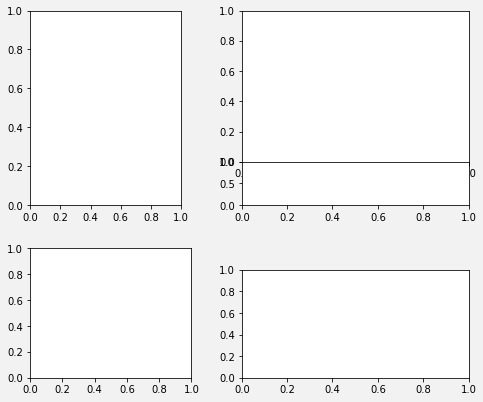

In [16]:
ica.plot_properties(raw, picks=0)

* Can't plot results due to type mismatching and missing electrode locations.